In [1]:
import cv2
import matplotlib.pyplot as plt

# 图像梯度
图像梯度，图像边界，使用cv2.Sobel，cv2.Schar和cv2.Laplacian等函数。
梯度简单来说就是求导。OpenCV提供了三种不同的梯度滤波器（高通滤波器）：Sobel，Scharr和Laplacian。Sobel，Scharr是求一阶或二阶导数，Scharr是对Sobel的优化，Laplacian是求二阶导数。

In [2]:
cv2.Sobel?
cv2.Laplacian?
cv2.Sobel?

# Sobel算子和Scharr算子
Sobel算子是高斯平滑与微分操作的结合体，所以它的抗噪声能力很好。Sobel可以设定求导的方向（xorder或yorder）以及卷积核的大小ksize。如果ksize=-1，会使用3x3的Scharr滤波器，效果比3x3的Sobel滤波器好，同时速度相同。3x3的Scharr滤波器卷积核如下：

$$
K_x=\frac{1}{25}\left[
\begin{matrix}
-3 & 0 & 3\\
-10 & 0 & 10\\
-3 & 0 & 3
\end{matrix}
\right]$$

$$
K_y=\frac{1}{25}\left[
\begin{matrix}
-3 & -10 & -3\\
0 & 0 & 0\\
3 & 10 & 3
\end{matrix}
\right]$$

# Laplacian算子
拉普拉斯算子可以使用二阶导数的形式定义，其离散实现类似于二阶Sobel导数，事实上，OpenCV在计算拉普拉斯算子时直接调用Sobel算子。计算公式如下：

$$\Delta{src}=\frac{\partial^2{src}}{\partial{x^2}}+\frac{\partial^2{src}}{\partial{y^2}}$$

拉普拉斯滤波器使用的卷积核如下所示：

$$kernel=\left[
\begin{matrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{matrix}
\right]$$

In [3]:
def bgr_to_rgb(bgr):
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb
def rgb_to_bgr(rgb):
    bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
    return bgr

In [4]:
img_src_bgr = cv2.imread('../../data/lena.jpg')

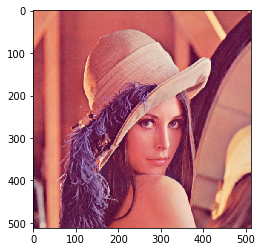

In [5]:
plt.imshow(bgr_to_rgb(img_src_bgr))

In [6]:
img_src_laplacian_bgr = cv2.Laplacian(img_src_bgr, -1)

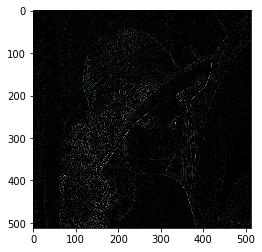

In [7]:
plt.imshow(bgr_to_rgb(img_src_laplacian_bgr))

其中ddepth可以设置-1代表与原图像数据类型相同，当然也可以使用cv2.CV_64F、cv2.CV_16S和cv2.CV_64F等。如果uint8对于一些负数导数会消失，所以一般做法可以先将输出的数据类型设置更高，然后取绝对值再把它转回到cv2.CV_8U

In [8]:
img_src_sobelx_bgr = cv2.Sobel(img_src_bgr, ddepth=-1, dx=1, dy=0, ksize=5)

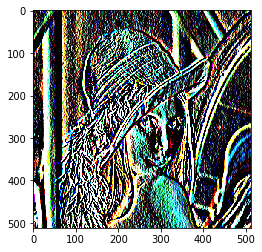

In [9]:
plt.imshow(bgr_to_rgb(img_src_sobelx_bgr))

In [10]:
img_src_sobely_bgr = cv2.Sobel(img_src_bgr, ddepth=-1, dx=0, dy=1, ksize=5)

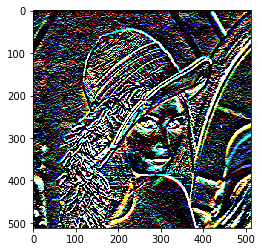

In [11]:
plt.imshow(bgr_to_rgb(img_src_sobely_bgr))